In [0]:
%tensorflow_version 1.x
import tensorflow as tf
import h5py
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
#import pickle
import seaborn as sns

Using TensorFlow backend.


### Connecting to Drive to read the data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Reading HDF5 format(.h5) file from Drive

In [0]:
f = h5py.File('/content/drive/My Drive/NN_Project/SVHN_single_grey1.h5', 'r')

### Names of the groups in HDF5 file.

In [0]:
for key in f.keys():
  print(key) 

X_test
X_train
X_val
y_test
y_train
y_val


### Extracting each group and storing the value in the corresponding datasets.

In [0]:
X_test = f['X_test']
X_train = f['X_train']
X_val = f['X_val']
y_test = f['y_test']
y_train = f['y_train']
y_val = f['y_val']

In [0]:
X_test = X_test.value
X_train = X_train.value
X_val = X_val.value
y_test = y_test.value
y_train = y_train.value
y_val = y_val.value

In [0]:
print("Number of images in:")
print("Train dataset: "+str(X_train.shape[0]))
print("Validation dataset: "+str(X_val.shape[0]))
print("Test dataset: "+str(X_test.shape[0]))
X_train.shape

Number of images in:
Train dataset: 42000
Validation dataset: 60000
Test dataset: 18000


(42000, 32, 32)

### Viewing the images present in the dataset

In [0]:
img1 = X_train[0,:,:]
img1_key = y_train[0]

Number in the image is: 2


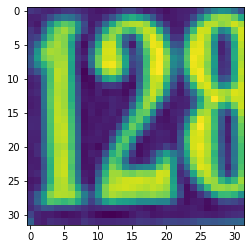

In [0]:
print("Number in the image is: "+str(img1_key))
plt.imshow(img1)

In [0]:
img2 = X_train[100,:,:]
img2_key = y_train[100]

Number in the image is: 0


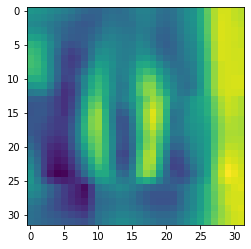

In [0]:
print("Number in the image is: "+str(img2_key))
plt.imshow(img2)

In [0]:
img3 = X_train[234,:,:]
img3_key = y_train[234]

Number in the image is: 8


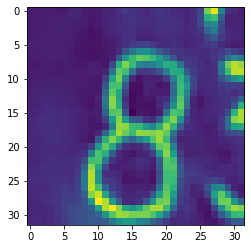

In [0]:
print("Number in the image is: "+str(img3_key))
plt.imshow(img3)

### Reshaping the input and the output data and storing in a new variable

In [0]:
X_train_nn = X_train.reshape(X_train.shape[0], 32, 32, 1).astype('float32')
X_test_nn = X_test.reshape(X_test.shape[0], 32, 32, 1).astype('float32')
X_val_nn = X_val.reshape(X_val.shape[0], 32, 32, 1).astype('float32')
X_train_nn /= 255
X_test_nn /= 255
X_val_nn /= 255
y_train_nn = np_utils.to_categorical(y_train, 10)
y_test_nn = np_utils.to_categorical(y_test, 10)
y_val_nn = np_utils.to_categorical(y_val, 10)

### Parameter defenition and Model creation

In [0]:
BATCH_SIZE = 32
EPOCHS = 15

In [0]:
model = Sequential()

# 1st Conv Layer
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 1)))
model.add(Activation('relu'))

# 2nd Conv Layer
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))

# 3rd Conv Layer
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
    
# Dropout
model.add(Dropout(0.1))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
    
# Dropout
model.add(Dropout(0.5))

# Prediction Layer
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
   
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model.fit(X_train_nn, y_train_nn, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, validation_data=(X_val_nn, y_val_nn), callbacks=callback_list)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 42000 samples, validate on 60000 samples
Epoch 1/15





42000/42000 [==============================] - 17s 408us/step - loss: 1.0070 - acc: 0.6735 - val_loss: 0.5039 - val_acc: 0.8483
Epoch 2/15
42000/42000 [==============================] - 10s 233us/step - loss: 0.5812 - acc: 0.8228 - val_loss: 0.3765 - val_acc: 0.8907
Epoch 3/15
42000/42000 [==============================] - 10s 231us/step - loss: 0.4998 - acc: 0.8446 - val_loss: 0.3591 - val_acc: 0.8933
Epoch 4/15
42000/42000 [==============================] - 10s 231us/step - loss: 0.4577 - acc: 0.8583 - val_loss: 0.2958 - val_acc: 0.9122
Epoch 5/15
42000/42000 [==============================] - 10s 229us/step - loss: 0.4257 - acc: 0.8667 - val_loss: 0.2736 - val_acc: 0.9197
Epoch 6/15
42000/42000 [==============================] - 10s 227us/step - loss: 0.3901 - acc: 0.8797 - val_loss: 0.2565 - val_acc: 0.9261
Epoch 7/15
420

### Evaluating the model on the test data and check the accuracy.

In [0]:
model.evaluate(x=X_test_nn, y=y_test_nn)

18000/18000 [==============================] - 1s 52us/step


[0.3367886358201504, 0.9103888888888889]

### KNN based classification

#### Extracting feaures from the images for applying KNN

In [0]:
X_test.shape

(18000, 32, 32)

In [0]:
X_test_reshaped = X_test.reshape(X_test.shape[0],1024)
X_train_reshaped = X_train.reshape(X_train.shape[0],1024)
X_val_reshaped = X_val.reshape(X_val.shape[0],1024)
y_test_reshaped = np_utils.to_categorical(y_test, 10)
y_train_reshaped = np_utils.to_categorical(y_train, 10)
y_val_reshaped = np_utils.to_categorical(y_val, 10)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform')
knn.fit(X_train_reshaped, y_train_reshaped)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
acc = knn.score(X_val_reshaped, y_val_reshaped)

In [0]:
#acc = 81% from the above statement.
print(acc*100)

NameError: ignored

In [0]:
test_acc = knn.score(X_test_reshaped, y_test_reshaped)

In [0]:
print(test_acc*100)

37.87222222222223
